# Scratch Implementation of PCA

## What is "Dimensionality Reduction Problem"? Why is it necessary in Machine Learning?

Ans: Problems with classification in machine learning often involve too many factors on the basis of which the final classification is done. These factors are basically so called features variables. The higher the number of items, the more difficult it is for the training set to be visualized and then worked on. Some of these features often become linked, and thus redundant. 
Reduction of dimensionality plays a vital role in machine learning, such as reducing unnecessary noise from the model to enhance performance. This also helps to compact data and to reduce the space needed for storage. Similarly, we can quickly delete redundant data with the aid of this method, and reduce our calculation time as much as possible.

## What is PCA? Discuss few applications in Machine Learning... 

Ans: PCA is mostly used as a tool in exploratory data analysis and for making predictive models. It is often used to visualize genetic distance and relatedness between populations. PCA is either done by singular value decomposition of a design matrix or by doing the following 2 steps:

calculating the data covariance (or correlation) matrix of the original data
performing eigenvalue decomposition on the covariance matrix

Some of the few application of PCA in machine learning are discussed below:

1)Neuroscience<br>
   In neuroscience inorder, PCA is used to identify the specific properties of a stimulus stimulus that increase the probability of a neuron generating a potential for action. This was also used during phase transistion in the brain to determine collective variables.
    
2)Facial Recognition<br>
   PCA is one of the techniques that can be used to form a set of basic features using the EigenFaces aaproach in face-images. This also reduces statistical complexity in the representation of face images. In addition, by combining techniques such as PCA and neural networks, the accuracy of face recognition has also been improved.
    
3)Image compression<br>
    PCA is also used for compression of images performed on any matrix of color values. With this, the accuracy of the image quality is increased by 40%. It is one of the technique's useful and relatively straightforward application by imaging an image as a matrix made from the color value of pixels.

## Write Short notes on the following topics:<br>
a) Variance & Covariance<br>
Ans: Variance is the process whereby the distance of each value from the mean is measured. This is generally used as a parameter referring to the variance's square root but not equivalent.

Covariance is the measurement process for strength and correlation between two or more sets of random varaibles. It is similar to variance but variance tells us how a single variable varies, but covariance tells us how two variables vary.

b) Eigenvalues & Eigenvectors<br>
Ans: Eigenvalues are a special set of scalars associated with a linear equation system which represents the proper roots, characteristic rules and values. These values are determined using the matrix of own value

Eigenvectors refers to the linear operator or characteristic function, which changes when linear transformation is applied to it due to scalar factor. There are two types of vectors of their own: left vector, and right vector. Left own vector refers to satisfying vector row whereas right own vector refers to satisfying vector column.

c) Eigen-value decompisition<br>
Ans: The decomposition of the original value refers to that type of decomposition which involves decomposing a square matrix into a set of ownvector and proper values. This is calculated by means of an efficient iterative algorithm or can be calculated in numpy by using the function prop).

d) Singular-value decompsition<br>
Ans: Singular value decomposition refers to matrix factorization in different matrices as well as algebraic properties and conveys important geometric and theoretical data.

e) EVD vs SVD<br>
Ans: EVD stands for decomposing Eigen Value whereas SVD stands for decomposing Singular Value. Orthogonal EVD is not necessary i.e. it does not represent rotation. SVD is orthonormal i.e. it represents rotation. Non-diagonal matrices in EVD are the opposite of each other while non-diagonal matrices in SVD are the opposite of each other.

f) Orthogonal Projections<br>
Ans: Orthogonal projection refers to an object's two-dimensional graphic representation in which the projection lines are at the exact angles to the projection plane. This also helps us understand the relationship between orthogonal decomposition and projection of the orthogonal.

g) PCA vs LDA<br>
Ans: PCA stands for Principle Component Analysis and is an unsupervised algorithm that ignores the class labels that maximize the variance in a dataset while LDA stands for Linear Discriminant Analysis and is a supervised learning that takes the class label into account. PCA basically summarizes the data while LDA maximizes the distance of each class between the centroid. 

# Implementation of PCA

## Some Basic Theory

## Orthogonal Projections

projection of a vector $\boldsymbol x$ onto a 1-dimensional subspace $U$ with basis vector $\boldsymbol b$ we have

$${\pi_U}(\boldsymbol x) = \frac{\boldsymbol b\boldsymbol b^T}{{\lVert\boldsymbol  b \rVert}^2}\boldsymbol x $$

And for the general projection onto an M-dimensional subspace $U$ with basis vectors $\boldsymbol b_1,\dotsc, \boldsymbol b_M$ we have

$${\pi_U}(\boldsymbol x) = \boldsymbol B(\boldsymbol B^T\boldsymbol B)^{-1}\boldsymbol B^T\boldsymbol x $$

where 

$$\boldsymbol B = [\boldsymbol b_1,...,\boldsymbol b_M]$$

In [1]:


# Projection onto a general (higher-dimensional) subspace
# ===YOU SHOULD EDIT THIS FUNCTION===
def projection_matrix_general(B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    P = (B @ (np.linalg.inv(B.T@B))@B.T) # <-- EDIT THIS
    
    return P

# ===YOU SHOULD EDIT THIS FUNCTION===
def project_general(x, B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        x: ndarray of dimension (D, 1), the vector to be projected
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        p: projection of x onto the subspac spanned by the columns of B; size (D, 1)
    """
    p = projection_matrix_general @ x  # <-- EDIT THIS
    return p

In [2]:
#Write these formulae in pyhton:

# Projection 1d
# ===YOU SHOULD EDIT THIS FUNCTION===
def projection_matrix_1d(b):
    """Compute the projection matrix onto the space spanned by `b`Args:
        b: ndarray of dimension (D, 1), the basis for the subspace
    Returns:
        P: the projection matrix
    """
    D, _ = b.shape
    ### Edit the code below to compute a projection matrix of shape (D,D)
    P = (b @ b.T)/(np.linalg.norm(b)**2) # <-- EDIT THIS(se) think x is missing here. 
#     (se) Operators * and @, functions dot(), and multiply():
    return P
    ###

# ===YOU SHOULD EDIT THIS FUNCTION===
def project_1d(x, b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        x: the vector to be projected
        b: ndarray of dimension (D, 1), the basis for the subspace
    
    Returns:
        y: ndarray of shape (D, 1) projection of x in space spanned by b
    """
    p = projection_matrix_1d @x # <-- EDIT THIS
    return p

Assume that we are performing PCA on
some dataset $\boldsymbol X$ for $M$ principal components. 
We then need to perform the following steps, which we break into parts:

1. Data normalization (`normalize`).
2. Find eigenvalues and corresponding eigenvectors for the covariance matrix $S$.
   Sort by the largest eigenvalues and the corresponding eigenvectors (`eig`).

After these steps, we can then compute the projection and reconstruction of the data onto the spaced spanned by the top $n$ eigenvectors.

## Why normalization is necessary in PCA?


In PCA normalization is important as it is a variance that maximizes exercise. It projects your original information in directions to maximize the variance. The first plot below shows the amount of total variance explained in the various main components where the data were not standardized. As you can see, the component one seems to explain most variance in the data.

Likewise, if the variance of each component is greater, PCA will perform worse without standardization than with normalization. So normalization in PCA is important because of this reason.

$$\bar X =  \frac{X - \mu}{\sigma}$$
Ans: Here this is the formula of zero mean and unit variance normalization where µ denotes the mean value of the vector X and σ represents its standard deviation. This is used in order to transform the feature vector of x to a random variable with a mean value of zero and variance of one.

In [3]:
def normalize(X):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    mu = np.mean(X, axis=0)  # <-- EDIT THIS, compute the mean of X
    std = np.std(X, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1.
    Xbar = (X - mu)/std_filled  # <-- EDIT THIS, compute the normalized data Xbar
    return Xbar, mu, std

def eig(S):
    """Compute the eigenvalues and corresponding eigenvectors 
        for the covariance matrix S.
    Args:
        S: ndarray, covariance matrix
    
    Returns:
        (eigvals, eigvecs): ndarray, the eigenvalues and eigenvectors

    Note:
        the eigenvals and eigenvecs should be sorted in descending
        order of the eigen values
    """
    eigen_values, eigen_vectors = np.linalg.eig(S) #Try to understand this
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]
    return (eigen_values, eigen_vectors) 

def projection_matrix(B):
    """Compute the projection matrix onto the space spanned by `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    return (B@(np.linalg.inv(B.T@B))@B.T) 
def PCA(X, num_components):
    """
    Args:
        X: ndarray of size (N, D), where D is the dimension of the data,
           and N is the number of datapoints
        num_components: the number of principal components to use.
    Returns:
        X_reconstruct: ndarray of the reconstruction
        of X from the first `num_components` principal components.
    """
    X, mean, std = normalize(X)
    S = np.cov(X, rowvar=False, bias=True)
    eig_vals, eig_vecs = eig(S)
    P = projection_matrix(eig_vecs[:, :num_components]) #Try to understand this
    X = (P @ X.T).T
    # your solution should take advantage of the functions you have implemented above.
    return X 


Now, Lets use this idea using numpy :)

## Warning: Do not import other libraries ....!

## Step 1: Load the data & required libraries

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)

In [6]:
#load the given iris data here:
iris = pd.read_csv("iris.data", header = None)
# Class 0 is sepal length, Class 1 is sepal width
# Class 2 is petal length, Class 3 is petal width

In [7]:
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target_class"]
iris.dropna(how ='all', inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target_class  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# Step 2: Data Visualization

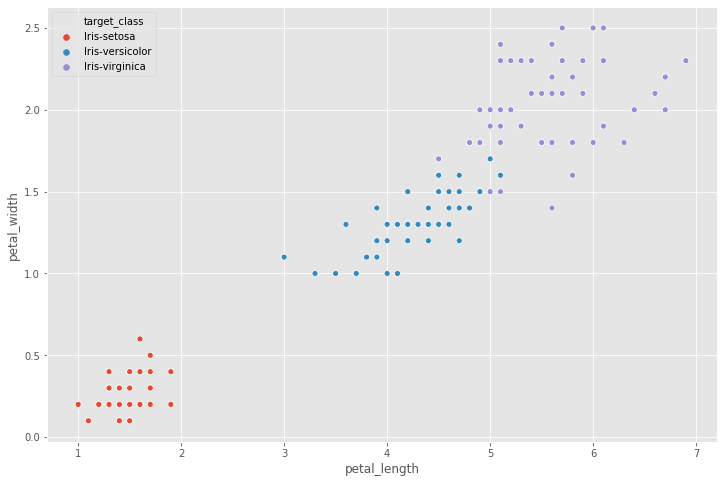

In [9]:
#use your own idea to visualize the data
s1 = sns.scatterplot(x="petal_length", y="petal_width", hue="target_class", data=iris)

In [10]:
sns.scatterplot

<function seaborn.relational.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)>

# Step 3: Data Pre-Processing

In [11]:
X = iris.iloc[:, 0:4].values #feature matrix
Y = iris.target_class.values #target vector

In [12]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
#It is used to standardize the feature values/matrix, X using (X-mean)/std. deviation

# Step 4: Computaion of Eigen Values & Eigen Vectors

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [13]:
#calculate covariance_matrix using numpy
covariance_matrix = np.cov(X.T)
print("Covariance Matrix \n", covariance_matrix)

Covariance Matrix 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the matrix of covariances. It does have the property it is symmetrical. 
We also restrict each column (eigenvectors) in such a way as to sum up the values to 1. 
Therefore they are orthonormal to one another.

Eigen decomposition of covariance matrix : $Σ = W\wedge W^{-1}$

W is the matrix composed by total eigenvectors, $\wedge$ is the diagonal matrix with all eigenvalues in diagonal.  

In [14]:
#calculate eigen_values, eigen_vectors using numpy
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors \n", eigen_vectors, "\n")
print("Eigenvalues \n", eigen_values, "\n")

Eigenvectors 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues 
 [2.93035378 0.92740362 0.14834223 0.02074601] 



# Step 5: Singular Value Decomposition (SVD)

This is basically used to diagonalize the feature matrix when it is not a square matrix.

In [15]:
evec_svd, s, v = np.linalg.svd(X.T)
print("Eigenvectors \n", evec_svd, "\n")

#here, we just interested in directions of vector, so sign doesn't matter

Eigenvectors 
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]] 



What is major difference between EVD & SVD?

The main difference between EVD and SVD is that SVD can be calculated either when matrices are square or rectangular, while EVD can be calculated only when matrices are square.

# Step 6: Picking Principal Components Using the Explained Variance

In [16]:
for val in eigen_values:
    print(val)

2.9303537755893165
0.9274036215173417
0.1483422264816399
0.02074601399559571


In [17]:
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
print("Variance Explained: \n", variance_explained)

#72% variance in our data is explained by the first eigen-value i.e, 2.930...

Variance Explained: 
 [72.77045209380134, 23.030523267680643, 3.683831957627389, 0.5151926808906266]


In [18]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

#If we used only 1st eigen value to choose principal components, We will be able to capture 72% of our data.
# If we choose 2 eigen values, 95% is handled and so on...

[ 72.77045209  95.80097536  99.48480732 100.        ]


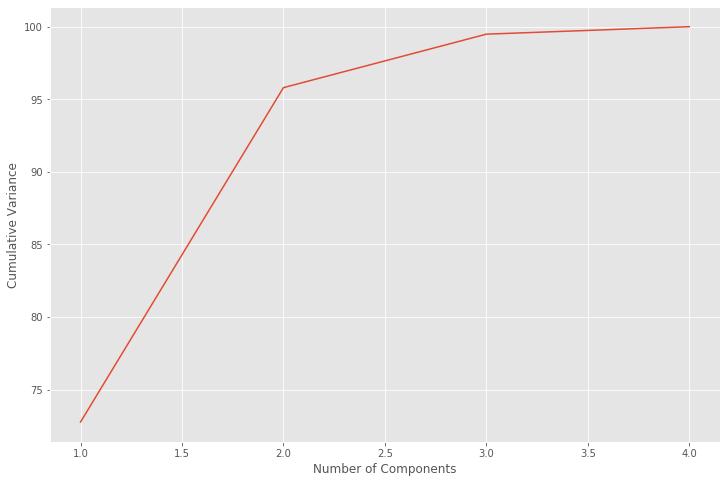

In [19]:
sns.lineplot(x = [1, 2, 3, 4], y = cumulative_variance_explained)
plt.xlabel ('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

# Step 7: Project Data onto Lower Dimensional Linear Subspace

In [20]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [21]:
aa = eigen_vectors.T[:][:]
bb = aa[:2]
projection_matrix = bb.T
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [22]:
x_pca = X.dot(projection_matrix)
x_pca

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

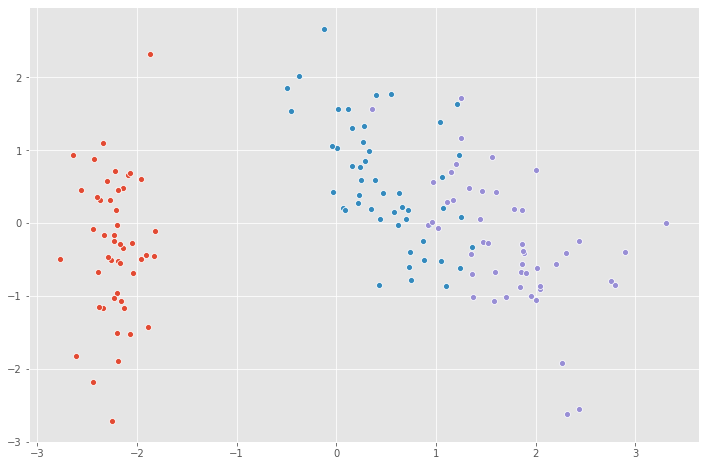

In [23]:
for target_class in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot (x_pca[Y == target_class, 0], 
                     x_pca[Y == target_class, 1])

# Can we classify after dimensionality reduction?

https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32

Yes, we can classify after the reduction of dimensionality, since reduction of dimensionality plays a vital role in machine learning particularly when working with thousands of features. PCA is also one of the reduction of dimensionality which looks for the properties which show the possible difference between groups. It is one of the steps necessary to construct space for the prinicipal components. In addition, the PCA algorithm uses the concept of variance matrix, matrix of co-variance, pairs of ownvectors and peer values to perform certain tasks.

In other words, by selecting the own vectors that have more variance and ignoring the own vector that has less variance, we can also reduce the dimension of the dataset. By doing so we can easily increase the accuracy and the classifier performance.